### Binomialverteilung

[Video](https://youtu.be/YQJc0jhwvWk)

#### Grundbegriffe

Eine Zufallsvariable X ist eine Funktion die jedem Ergebnis eines Zufallsexperiments eine Zahl zuordnet.

Ein Bernoulli-Experiment ist ein Zufallsexperiment mit 2 möglichen Ergebnissen.

Die Zufallsvariable X ist binomialverteilt mit den Parametern n und p, $X \sim  B(n,p)$, wenn sie die 
die Anzahl der Erfolge bei n unabhängigen Bernoulli-Experimenten beschreibt, bei denen jeder Versuch mit der gleichen Wahrscheinlichkeit 
p erfolgreich ist.

Beispiel:

    Zufallsexperiment: Würfle 8-mal. 
    X = Anzahl der Male, bei denen eine gerade Zahl (2, 4, 6) kommt.

    Zufallsexperiment: Wirf eine faire Münze 8-mal
    Y = Anzahl der Male, bei denen Kopf kommt

X und Y sind beide $B(8,0.5)$ verteilt. X und Y sind trotzdem verschiedene Zufallsvariablen, denn als Funktionen haben sie unterschiedliche Definitionsbereiche.

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

##### Binomialverteilte Daten erzeugen

100 Mal wird folgendes gemacht:
Eine Zufallsexperiment mit Erfolgswahrscheinlichkeit 0.5 wird 8-mal wiederholt und es werden die Erfolge gezählt.

In [6]:
n, p = 8, 0.5
daten = binom.rvs(n, p, size=100)
daten

array([4, 4, 5, 6, 3, 4, 4, 3, 4, 5, 3, 5, 4, 4, 2, 2, 3, 6, 7, 2, 5, 2,
       4, 1, 4, 4, 3, 5, 2, 5, 6, 6, 6, 5, 3, 5, 4, 4, 4, 5, 2, 4, 3, 5,
       2, 6, 3, 7, 5, 2, 5, 3, 2, 2, 3, 4, 4, 4, 5, 7, 4, 4, 1, 3, 3, 6,
       6, 5, 3, 6, 3, 6, 2, 4, 6, 4, 5, 5, 2, 8, 5, 6, 4, 6, 7, 5, 4, 4,
       5, 6, 5, 1, 2, 6, 4, 5, 1, 4, 5, 4])

##### Wahrscheinlichkeit berechnen: $P(X=k)$

*pmf* steht für *probability mass function*

In [7]:
# P(X = k)
n, p = 8, 0.5
k = 3
binom.pmf(k, n, p)

np.float64(0.21874999999999992)

##### Wahrscheinlichkeit berechnen: $P(X<=k)$

*cdf* steht für *cumulative density function*

In [8]:
# P(X <= k)
n, p = 8, 0.5
k = 3
binom.cdf(k, n, p)

np.float64(0.36328125)

##### Die Wahrscheinlichkeiten grafisch darstellen

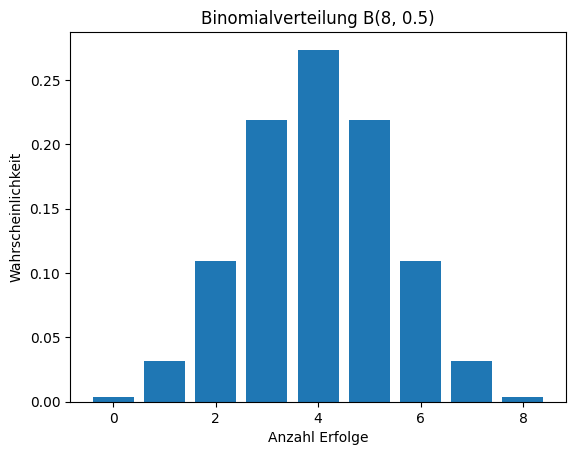

In [13]:
n, p = 8, 0.5
x = np.arange(n + 1)
ww = binom.pmf(x, n, p)

plt.bar(x, ww)
plt.xlabel('Anzahl Erfolge')
plt.ylabel('Wahrscheinlichkeit')
plt.title(f'Binomialverteilung B({n}, {p})')
plt.show()

##### Die kumulative Verteilungsfunktion

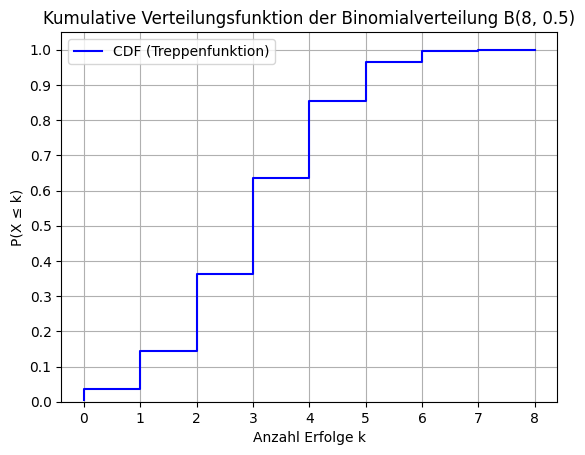

In [14]:
n, p = 8, 0.5
x = np.arange(n + 1)
cdf = binom.cdf(x, n, p)

# Treppenfunktion zeichnen
plt.step(x, cdf, label='CDF (Treppenfunktion)', color='blue')
 
# Zusatz: Gitter und Achsenbeschriftung
plt.xlabel('Anzahl Erfolge k')
plt.ylabel('P(X ≤ k)')
plt.title(f'Kumulative Verteilungsfunktion der Binomialverteilung B({n}, {p})')
plt.legend()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.grid(True)
plt.ylim(0, 1.05)  # y-Achse bis etwas über 1, damit obere Stufe gut sichtbar ist
plt.show()




#### Erwartungswert, Varianz, Standardabweichung

In [15]:
n, p = 8, 0.5
print(f'Erwartungswert = {binom.mean(n, p)}')
print(f'Standardabweichung = {binom.std(n, p)}')
print(f'Varianz = {binom.var(n, p)}')


Erwartungswert = 4.0
Standardabweichung = 1.4142135623730951
Varianz = 2.0


### Beispielaufgaben

In [16]:
'''
Ein idealer Würfel wird 20-mal geworfen. Wie ist die Wahrscheinlichkeit für genau sieben Sechsen.
'''
binom.pmf(7,20,1/6)

np.float64(0.025882058395798088)

In [17]:
'''
Etwa 41% der Bevölkerung haben Blutgruppe 0. Es werden 30 Personen zufällig ausgewählt. Wie ist die Wahrscheinlichkeit für:
a. höchstens 10 Personen haben Blutgruppe 0
b. mindestens 13 Personen haben Blutgruppe 0
c. mindestens 10 und höchstens 15 Personen haben Blutgruppe 0
'''
print(f'a. {binom.cdf(10,30,0.41):.3f}')
print(f'b. {1-binom.cdf(12,30,0.41):.3f}')
print(f'b. {binom.cdf(15,30,0.41)-binom.cdf(9,30,0.41):.3f}')

a. 0.254
b. 0.466
b. 0.733


Erwartungswert = 1.6
Wahrscheinlichkeitsverteilung:
0 -> 0.168
1 -> 0.336
2 -> 0.294
3 -> 0.147
4 -> 0.046
5 -> 0.009
6 -> 0.001
7 -> 0.000
8 -> 0.000


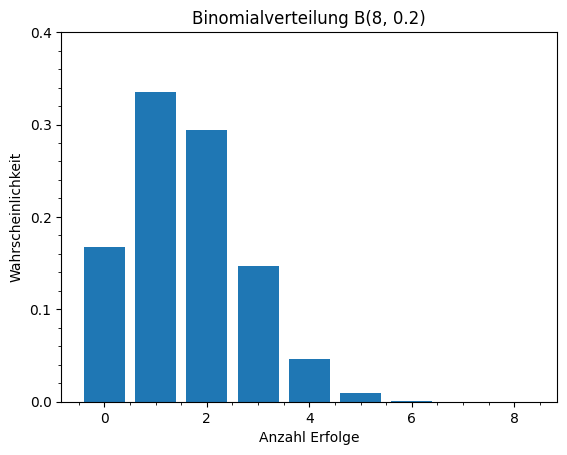

In [18]:
'''
In einem Glücksrad ist 1/5 der Fläche rot. Das Glücksrad wird 8-mal gedreht.
Bestimme den Erwartungswert, erstelle die Wahrscheinlichkeitsverteilung und zeichne das Histogramm
'''
n = 8
p = 1/5
print(f'Erwartungswert = {binom.mean(n,p)}')
print('Wahrscheinlichkeitsverteilung:')
for k in range(n+1):
    print(f'{k} -> {binom.pmf(k,n,p):.3f}')
    
x = np.arange(n + 1)
ww = binom.pmf(x, n, p)

plt.bar(x, ww)
plt.xlabel('Anzahl Erfolge')
plt.ylabel('Wahrscheinlichkeit')
plt.yticks(np.arange(0,0.41,step=0.1))
plt.minorticks_on()
plt.title(f'Binomialverteilung B({n}, {p})')
plt.show()

In [19]:
'''
Bei einer Sorte Blumenzwiebeln beträgt die Keimwahrscheinlichkeit 85%. Es werden 130 Zwiebeln gesetzt. 
Die Zufallsgröße X gibt die Anzahl der Zwiebeln an, die keimen. Bestimme die Wahrscheinlichkeit des sigma-Intervalls
und berechne die prozentuale Abweichung des Näherungswertes, den die Sigma-Regel liefert, vom tatsächlichen Wert.
'''
n = 130
p = 0.85
std = binom.std(n,p)
e = binom.mean(n,p)
print(f'Standardabweichung = {std:.3f}')
print(f'Erwartungswert = {e}')
ws = binom.cdf(e+std,n,p)-binom.cdf(e-std,n,p)
print(f'Wahrscheinlichkeit des Sigma-Intervalls = {ws:.3f}')
regel = 0.683
print(f'Wahrscheinlichkeit nach Sigma-Regel = {regel}')
abweichung = abs(regel-ws)
print(f'Abweichung = {abweichung}')
print(f'Das sind vom gemessenen Wert: {abweichung/ws*100:.2f} Prozent')

Standardabweichung = 4.071
Erwartungswert = 110.5
Wahrscheinlichkeit des Sigma-Intervalls = 0.675
Wahrscheinlichkeit nach Sigma-Regel = 0.683
Abweichung = 0.008319784583054823
Das sind vom gemessenen Wert: 1.23 Prozent


In [20]:
'''
Etwa 9% der männlichen Bevölkerung in Deutschland haben eine Rotgrünschwäche. Bestimme, wie groß eine Gruppe 
von zufällig ausgewählten Männern mindestens sein muss, damit mit einer Wahrscheinlichkeit von 85% mindestens
a. einer eine Rotgrünschwäche hat
b. fünf eine Rotgrünschwäche haben
'''
p = 0.09
n = 0
w = 0
while w < 0.85:
    n+=1
    w = 1-binom.pmf(0,n,p)
print(f'a.',n)

a. 21


In [21]:
n = 0
w = 0
while w < 0.85:
    n+=1
    w = 1-binom.cdf(4,n,p)
print(f'b.',n)

b. 80


Hinweis: die Suche nach dem Ergebnis könnten wir auch mit binärer Suche durchführen

In [22]:
'''
Ein Multiple-Choice-Test besteht aus 20 Fragen.
Zu jeder Frage gibt es gleich viele Antwortmöglichkeiten, von denen genau eine richtig ist. 
Die Wahrscheinlichkeit, dass jemand nur durch Raten den Test besteht, soll höchstens 5% betragen.
a. Für das Bestehen sind mindestens acht richtige Antworten notwendig. Bestimme die Mindestanzahl an
Antwortmöglichkeiten pro Frage.
b. Zu jeder Frage gibt es drei Antwortmöglichkeiten. Bestimme die Mindestanzahl an richtigen
Antworten, die für das Bestehen verlangt werden muss.
'''
# a.
n = 20
x = 2
p = 1/x
while 1-binom.cdf(7,n,p) > 0.05:
    x+=1
    p = 1/x
print('a.',x)

a. 5


In [23]:
# b.
n = 20
x = 1
p = 1/3
while 1-binom.cdf(x-1,n,p) > 0.05:
    x+=1
print('b.',x)

b. 11
